## Exploratory data analysis 4

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm

# to see all the columns always use 
pd.pandas.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('D:/Kaggle competitions/Housing Prices/train.csv')

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
# Actually lets try with something else
df.drop('Id',axis=1,inplace=True)

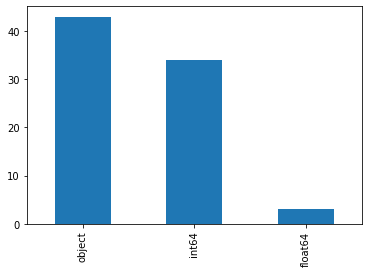

<Figure size 1440x720 with 0 Axes>

In [5]:
#Now we will find unique data types 
unique_values=df.dtypes.value_counts()
# Now we will plot 

unique_values.plot(kind='bar')
plt.figure(figsize=(20,10))
sns.despine()

In [6]:
#Finding out the numerical values 
integer_1=[]
float_1=[]
for col in df.columns:
    if df[col].dtype=='int64':
        integer_1.append(col)
    elif df[col].dtype=='float64':
        float_1.append(col)
    
numerical_data=integer_1+float_1
numerical_data

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt']

#  Checking the missing values

In [7]:
df['GarageYrBlt'].count()

1379

In [8]:

for values in df.columns:
    if df[values].isnull().sum() >1:
        print (values," ", df[values].isnull().sum()/df[values].count(),'%')

LotFrontage   0.21565362198168192 %
Alley   15.043956043956044 %
MasVnrType   0.005509641873278237 %
MasVnrArea   0.005509641873278237 %
BsmtQual   0.02600140548137737 %
BsmtCond   0.02600140548137737 %
BsmtExposure   0.026722925457102673 %
BsmtFinType1   0.02600140548137737 %
BsmtFinType2   0.026722925457102673 %
FireplaceQu   0.8961038961038961 %
GarageType   0.05873821609862219 %
GarageYrBlt   0.05873821609862219 %
GarageFinish   0.05873821609862219 %
GarageQual   0.05873821609862219 %
GarageCond   0.05873821609862219 %
PoolQC   207.57142857142858 %
Fence   4.195729537366548 %
MiscFeature   26.037037037037038 %


## Now we will check how many year variables are there 

In [9]:
year_columns=[]
for col in df.columns:
    if 'Yr'  in col or 'Year' in col:
        print(col)
        year_columns.append(col)

YearBuilt
YearRemodAdd
GarageYrBlt
YrSold


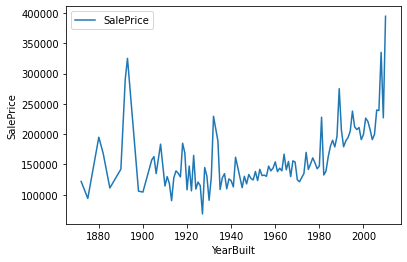

0.5228973328794968


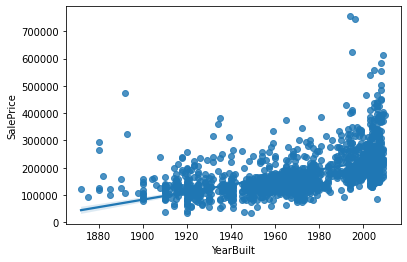

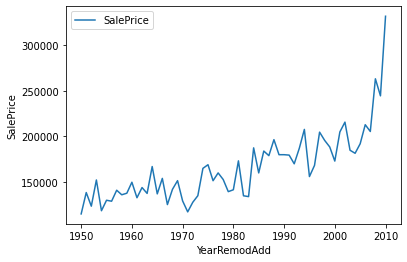

0.5071009671113862


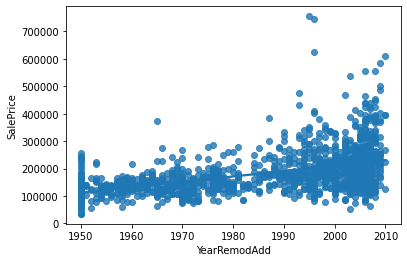

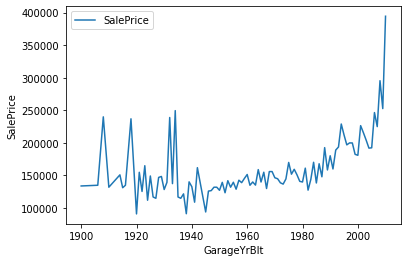

0.48636167748786086


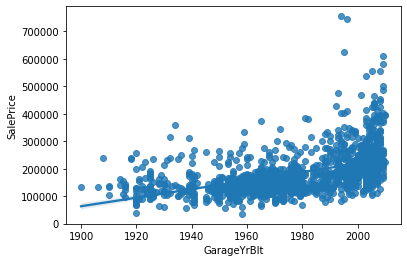

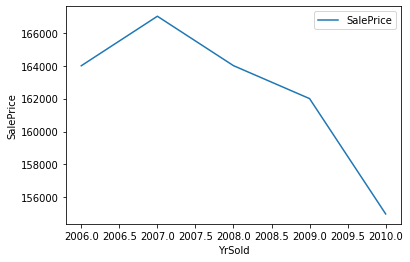

-0.028922585168730287


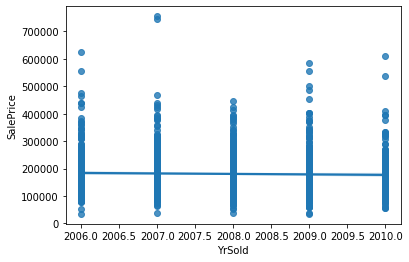

In [10]:
for col in year_columns:
    df.groupby(col)['SalePrice'].median().plot()
    plt.ylabel('SalePrice')
    plt.legend()
    plt.show()
    print(df[col].corr(df['SalePrice'],method='pearson'))
    sns.regplot(data=df,x=df[col],y='SalePrice')
    plt.show()

# Something seems to be wrong here !  with the year sold thing !! 
# Because the house price is decreasing with the year sold

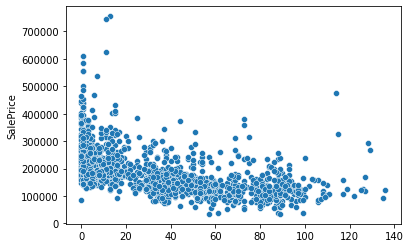

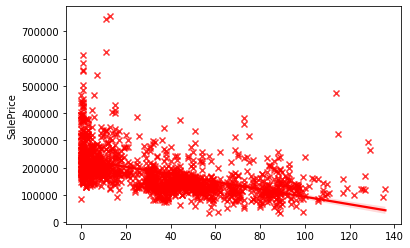

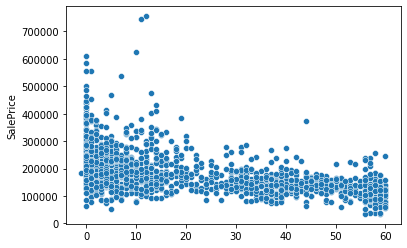

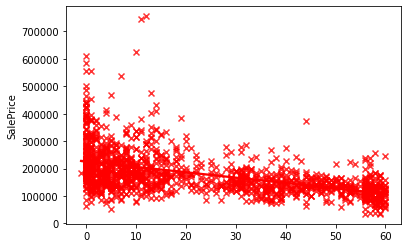

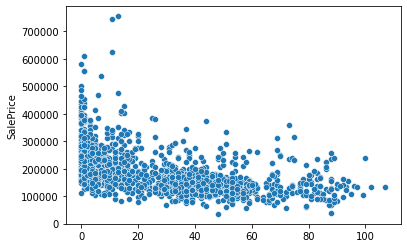

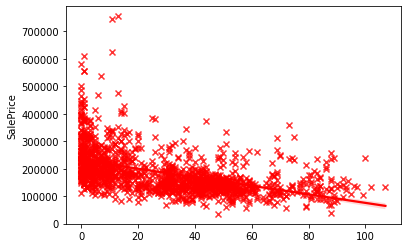

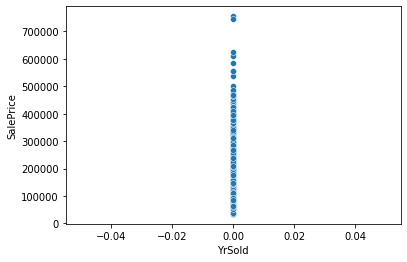

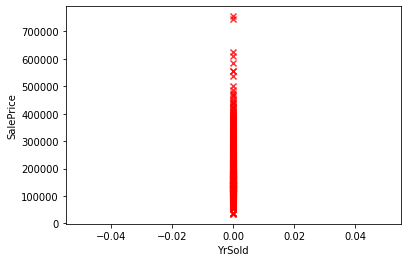

In [11]:
####df.groupby('YrSold')['SalePrice'].median().plot() 

'''basicalyy try to find out (yr built -year sold) and then find out the relation)'''
for col in year_columns:
    sns.scatterplot(data=df,x=df['YrSold']-df[col],y='SalePrice')
    plt.show()
    sns.regplot(data=df,x=df['YrSold']-df[col],y='SalePrice',color='r',marker='x')
    plt.show()
    (df['YrSold']-df[col]).corr(df['SalePrice']) 


### First of all finding the discrete features


        

In [12]:
discrete_columns=[]
for col in numerical_data:
    if len(df[col].unique()) <25 and col not in year_columns:
        discrete_columns.append(col)
discrete_columns

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

# Now we will plot the discrete values 

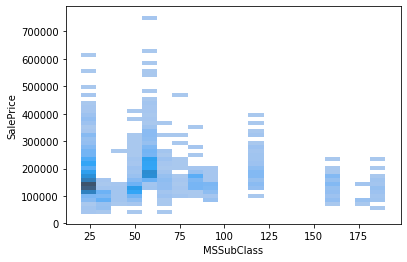

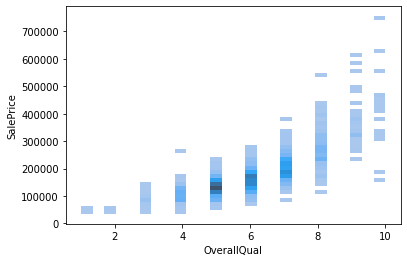

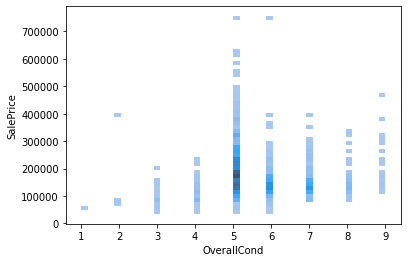

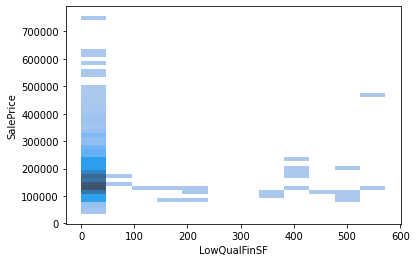

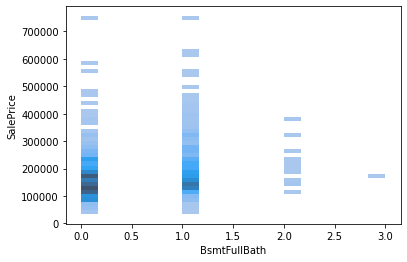

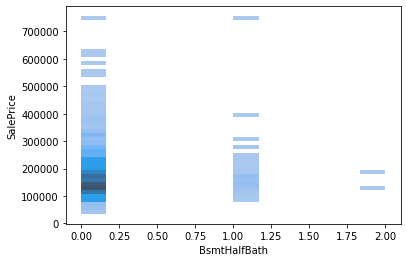

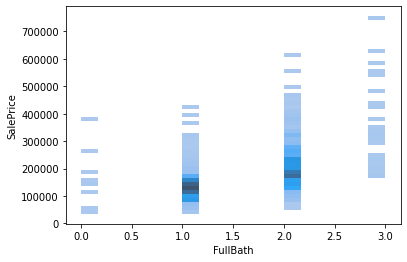

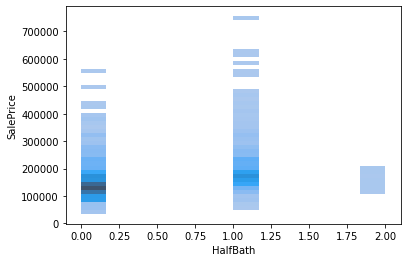

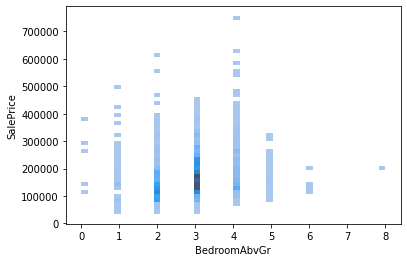

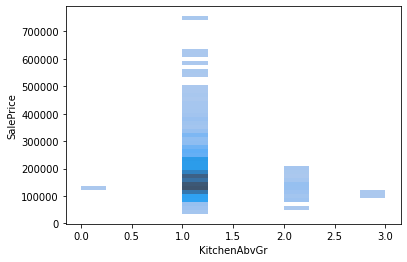

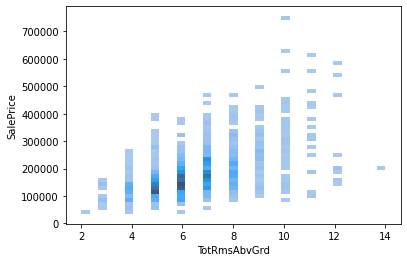

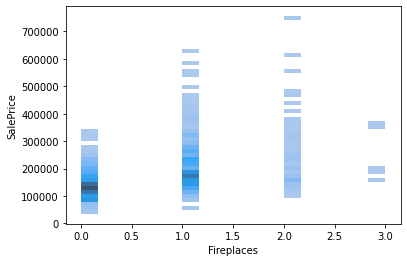

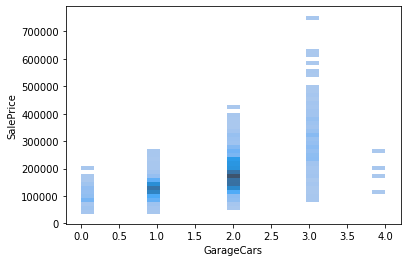

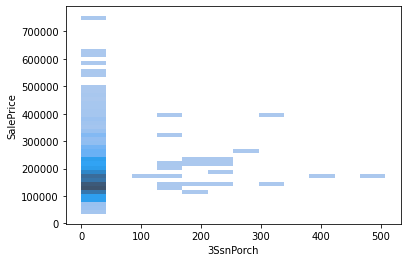

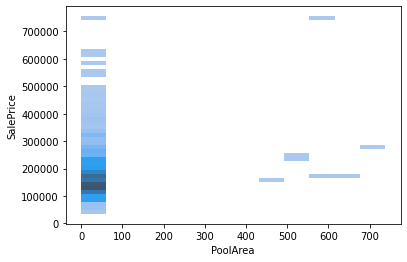

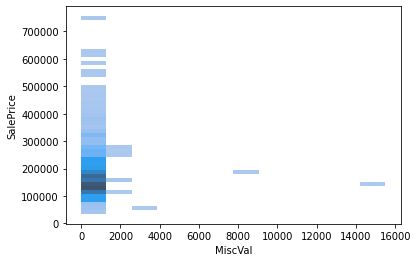

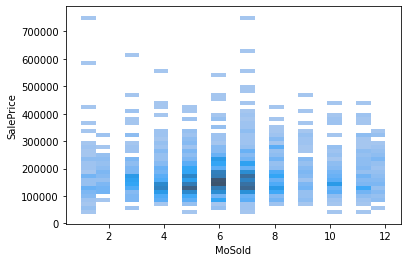

In [13]:
for col in discrete_columns:
    sns.histplot(data=df,x=df[col],y=df['SalePrice'])
    plt.show()
    

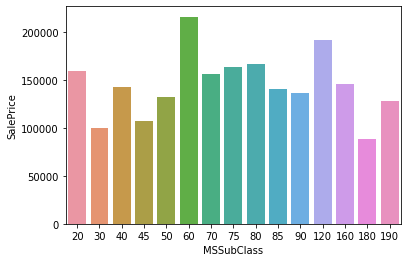

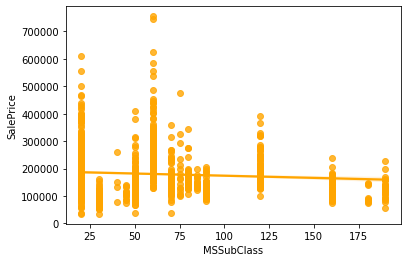

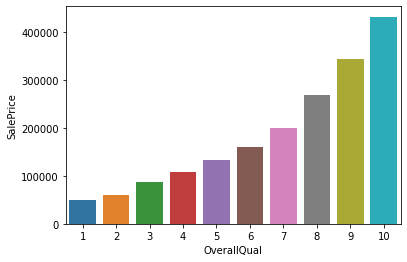

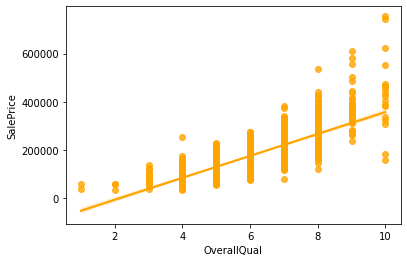

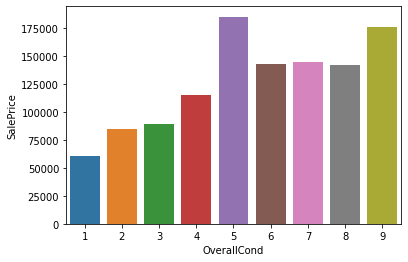

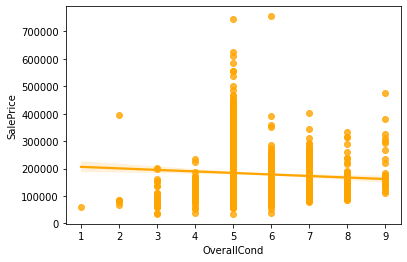

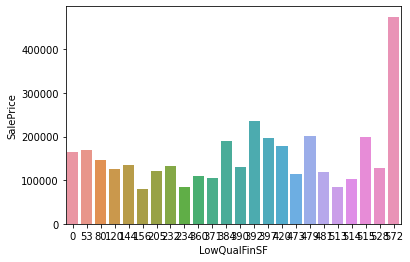

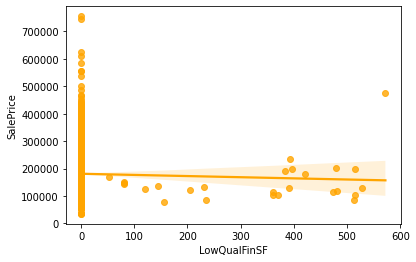

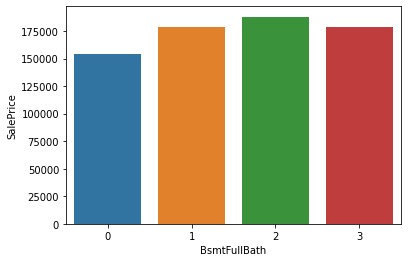

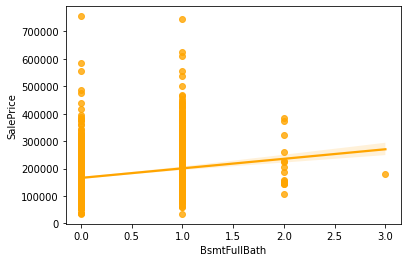

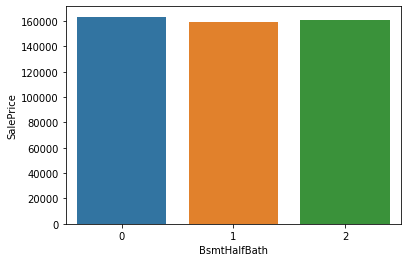

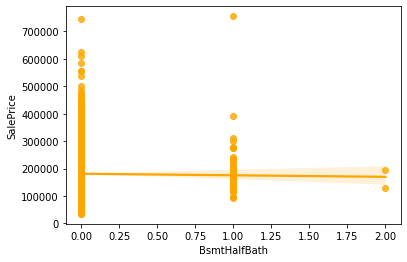

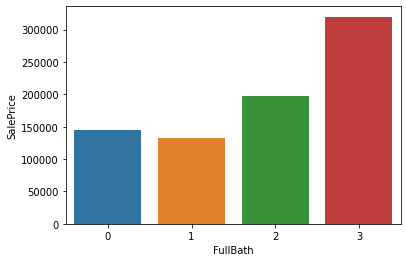

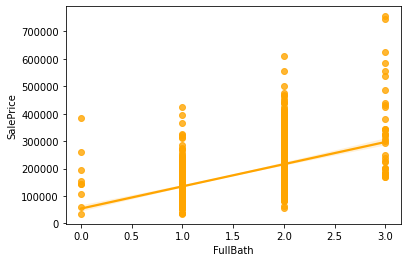

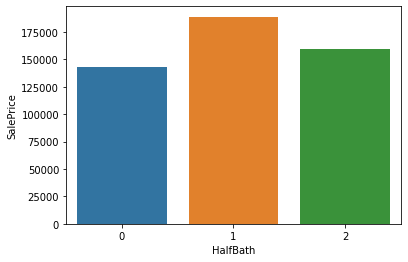

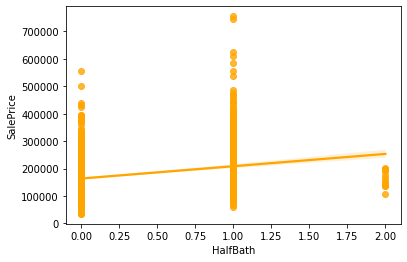

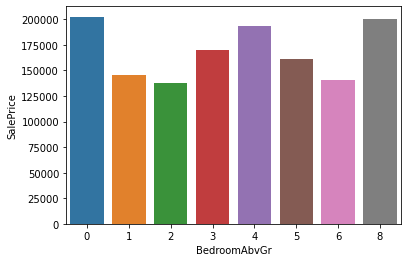

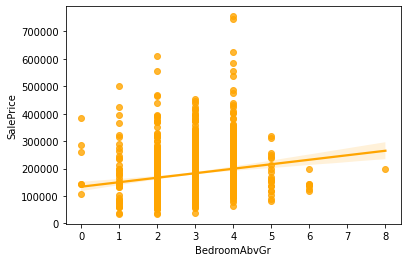

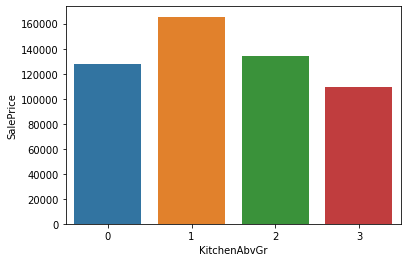

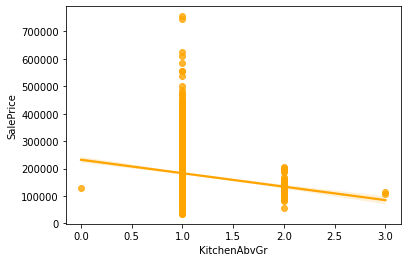

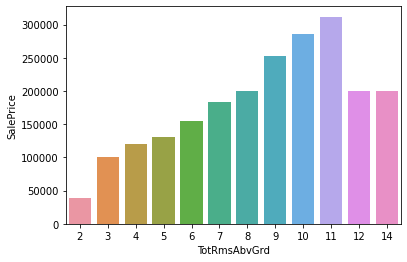

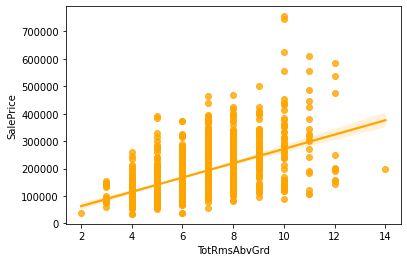

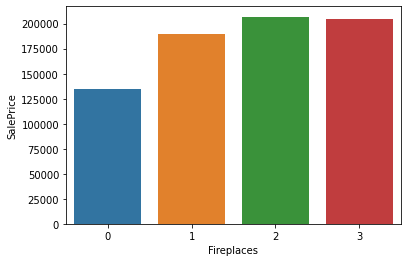

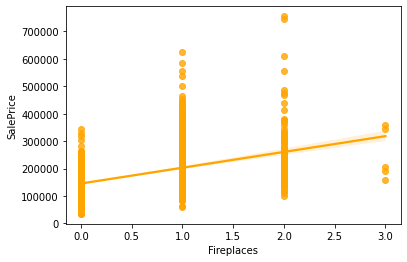

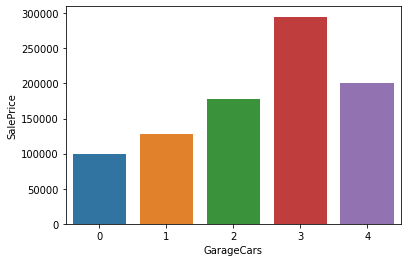

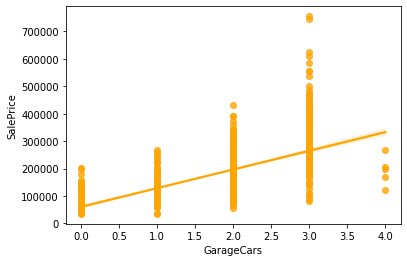

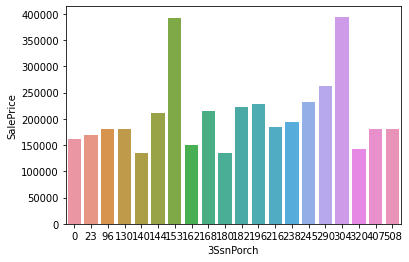

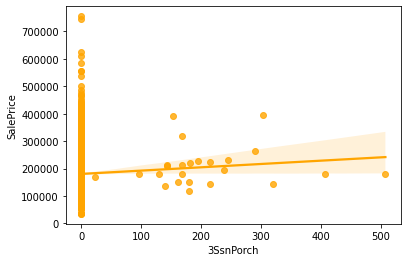

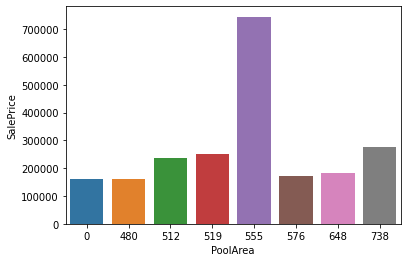

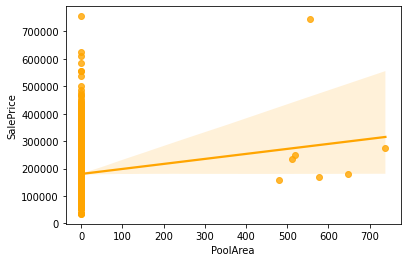

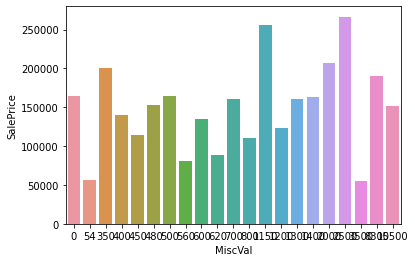

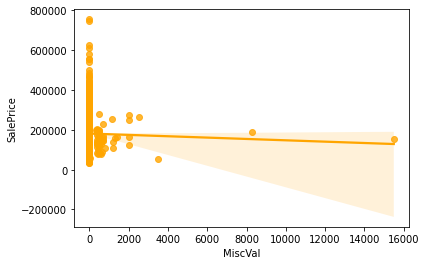

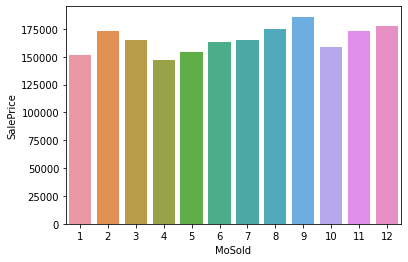

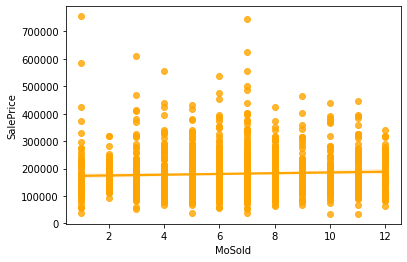

In [14]:
for col in discrete_columns:
    sns.barplot(data=df,x=col,y='SalePrice',estimator=np.median,ci=False)
    plt.show()
    sns.regplot(data=df,x=col,y='SalePrice',color='orange')
    sns.color_palette("hls", 8)
    plt.show()

#### From here we can see that  Overall quality is a really important feature, Garage cars,Fireplace,TotRmsAbvGrd,BedroomAbvGr,Full bath is important

## Checking for continuous features

In [15]:
continious_columns=[]
for col in numerical_data:
    if col not in discrete_columns and  year_columns:
        continious_columns.append(col)
continious_columns

['LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'YrSold',
 'SalePrice',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt']

## Now first of all , we need to check the distribution of the continious variable

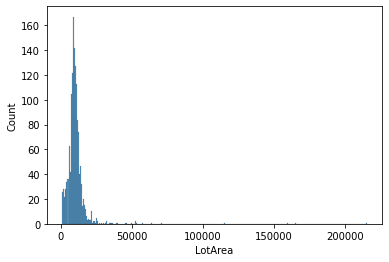

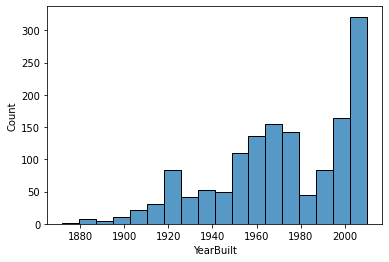

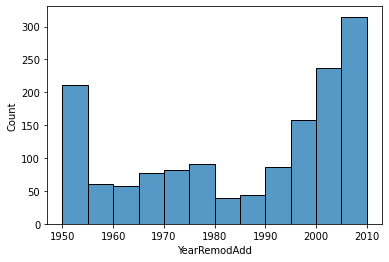

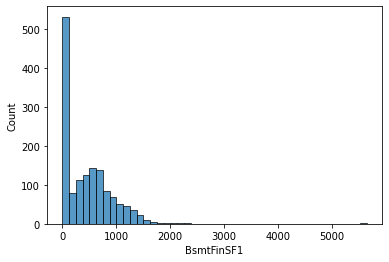

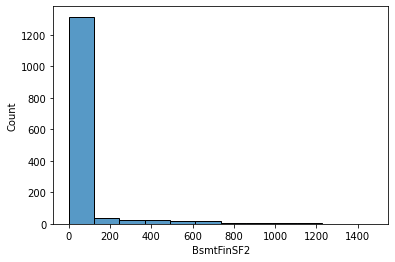

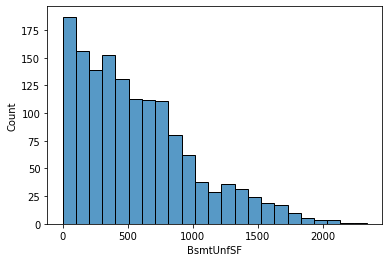

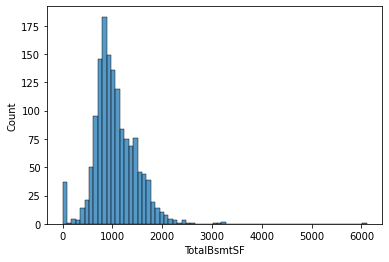

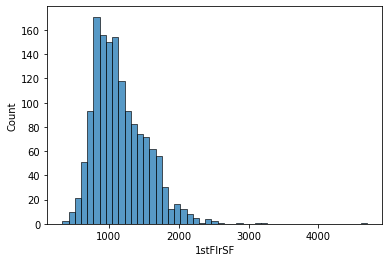

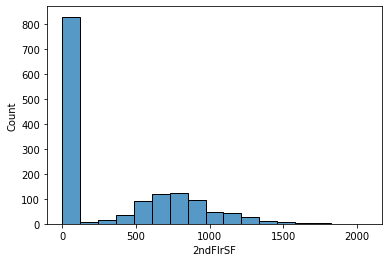

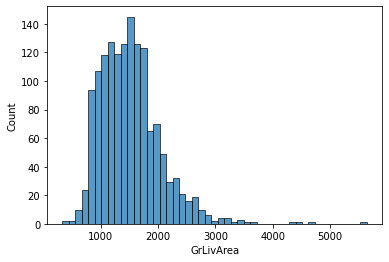

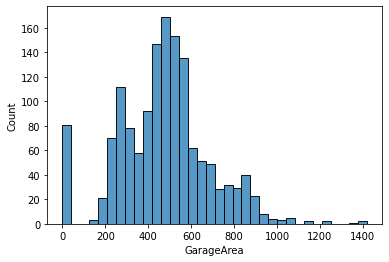

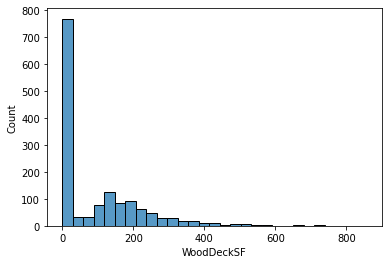

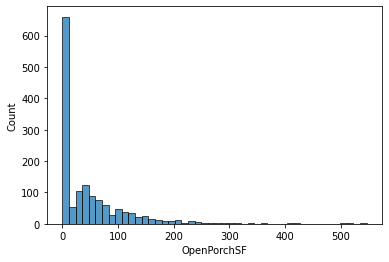

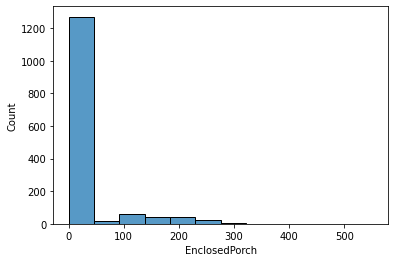

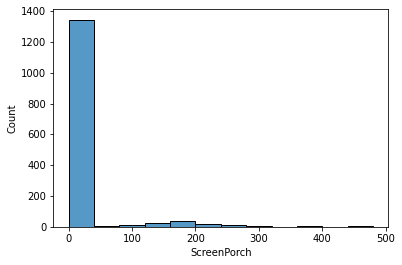

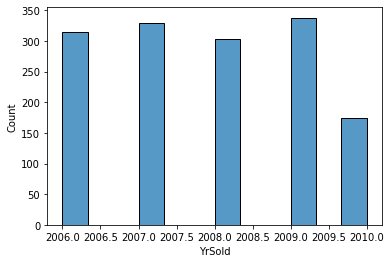

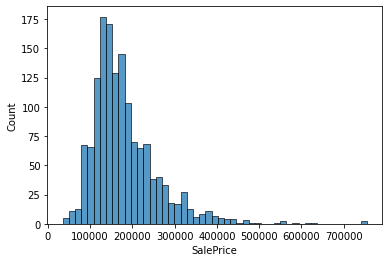

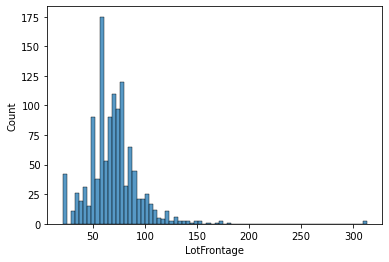

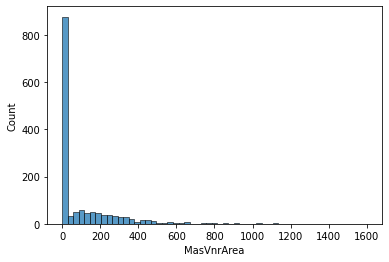

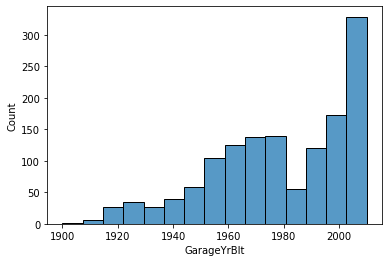

In [16]:
for col in continious_columns:
    sns.histplot(x=df[col])
    plt.show()

## Basically what the plot implies is  , that it's a skewed data , so what to do with it ?

### whenever the distribution is not normal / gaussian , then you should try to convert it to normal distribution which will help the model

#### check out this website : https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9#:~:text=Log%20Transformation%20is%20pretty%20awesome,validity%20of%20our%20statistical%20analyses.

#### : If you assume a model form that is non-linear but can be transformed to a linear model such as logY=β0+β1t then one would be justified in taking logarithms of Y to meet the specified model form.

## Basically it converts non linear functions/relations into linear relations 

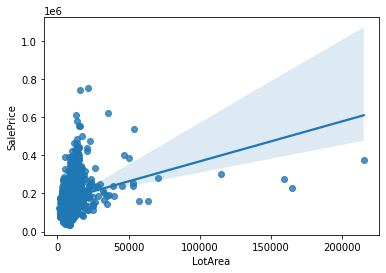

The correlation is  0.2638433538714056


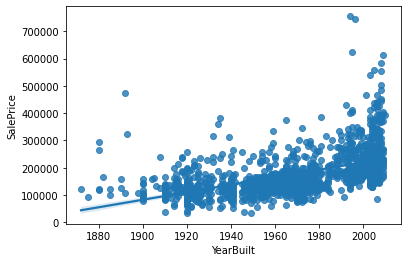

The correlation is  0.5228973328794968


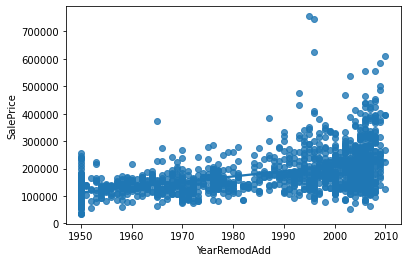

The correlation is  0.5071009671113862


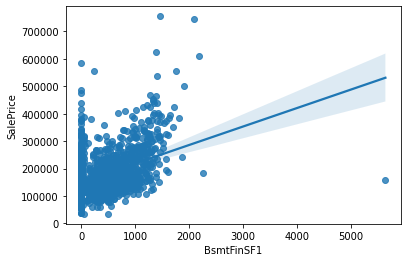

The correlation is  0.3864198062421531


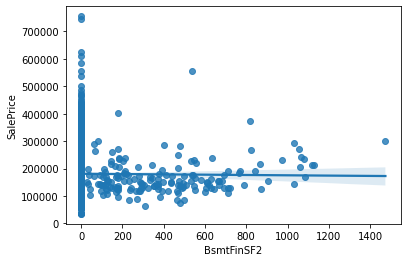

The correlation is  -0.011378121450215137


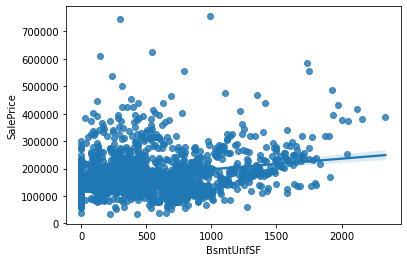

The correlation is  0.2144791055469689


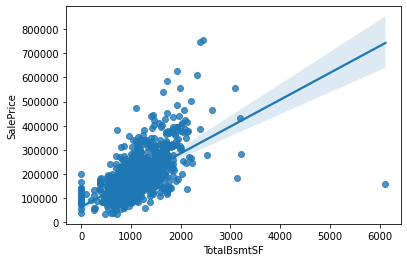

The correlation is  0.6135805515591954


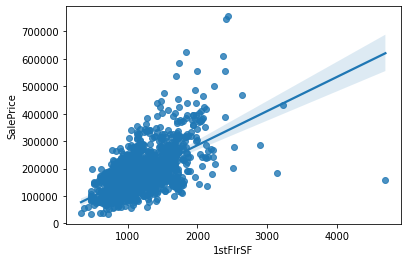

The correlation is  0.6058521846919145


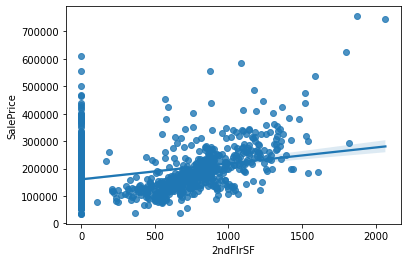

The correlation is  0.3193338028320677


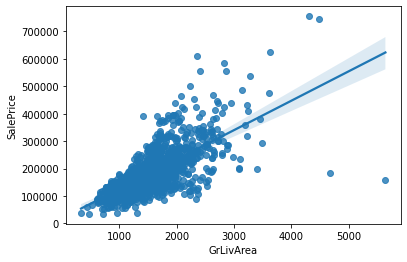

The correlation is  0.7086244776126521


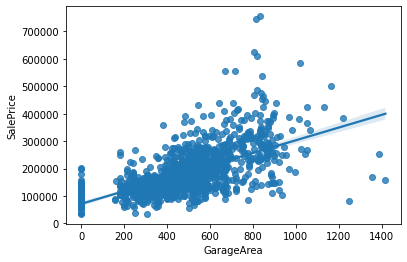

The correlation is  0.6234314389183616


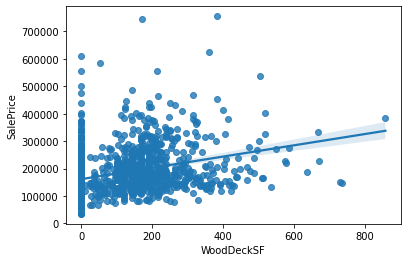

The correlation is  0.3244134445681296


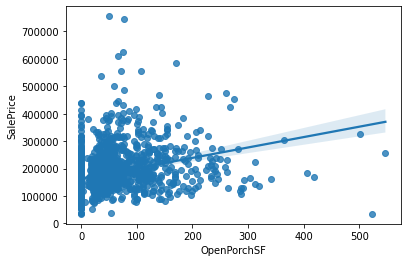

The correlation is  0.3158562271160552


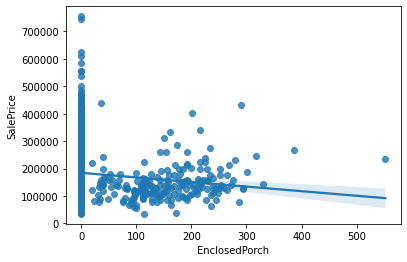

The correlation is  -0.12857795792595658


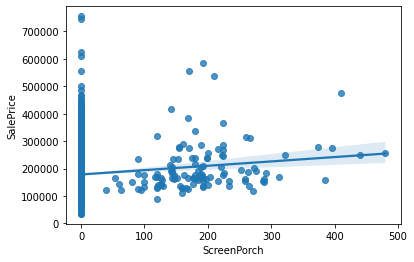

The correlation is  0.11144657114291115


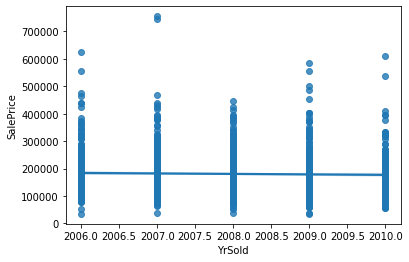

The correlation is  -0.028922585168730287


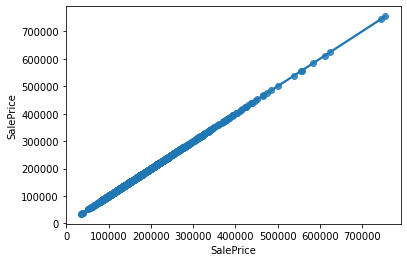

The correlation is  0.9999999999999998


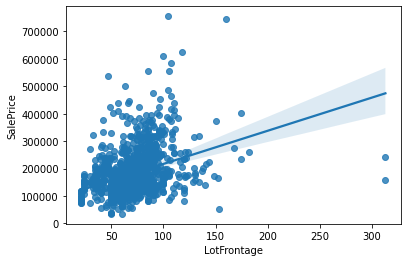

The correlation is  0.351799096570678


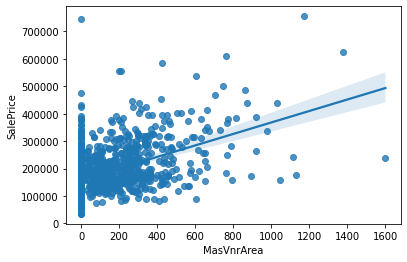

The correlation is  0.4774930470957155


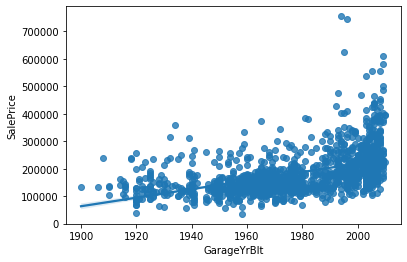

The correlation is  0.48636167748786086


In [17]:
for col in continious_columns:
    sns.regplot(data=df,x=col,y='SalePrice')
    plt.show()
    print("The correlation is ",df[col].corr(df['SalePrice']))

In [18]:
data=df.copy()

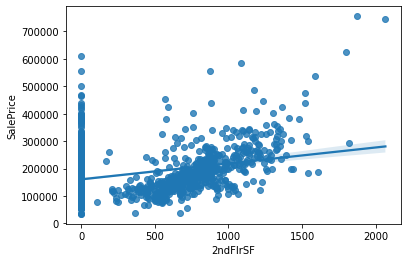

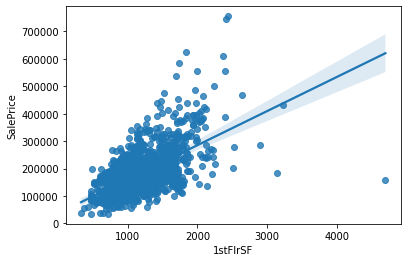

 the dataset 1 +2 is  0.716883079369281


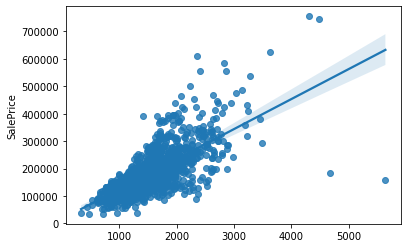

In [19]:
sns.regplot(data=data,x='2ndFlrSF',y='SalePrice')
data['2ndFlrSF'].corr(data['SalePrice'])
plt.show()

sns.regplot(data=data,x='1stFlrSF',y='SalePrice')
data['1stFlrSF'].corr(data['SalePrice'])
plt.show()

sns.regplot(data=data,x=data['1stFlrSF']+data['2ndFlrSF'],y='SalePrice')

print(" the dataset 1 +2 is ",(data['1stFlrSF']+data['2ndFlrSF']).corr(data['SalePrice'])) # THis is a waste

In [20]:
data['TotalFlrsF']=data['1stFlrSF'] +data['2ndFlrSF']
data.drop(['1stFlrSF','2ndFlrSF'],axis=1,inplace=True)

#  Now we will log scale the features

In [21]:
## Only for the non normalized features
non_normal_features=['LotArea','BsmtFinSF2','SalePrice','TotalFlrsF','GrLivArea','LotFrontage','TotalBsmtSF']

for col in non_normal_features:
    if 0 in data[col].unique():
        pass
    else:
        data[col]=np.log(data[col])

In [22]:
data.head()

MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0          60       RL     4.174387  9.041922   Pave   NaN      Reg   
1          20       RL     4.382027  9.169518   Pave   NaN      Reg   
2          60       RL     4.219508  9.328123   Pave   NaN      IR1   
3          70       RL     4.094345  9.164296   Pave   NaN      IR1   
4          60       RL     4.430817  9.565214   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  LowQualFinSF  GrLivArea  \
0    GasA        Ex          Y      SBrkr             0   7.444249   
1    GasA        Ex          Y      SBrkr             0   7.140453   
2    GasA        Ex          Y      SBrkr             0   7.487734   
3    GasA        Gd          Y      SBrkr             0   7.448334   
4    GasA        Ex          Y      SBrkr             0   7.695303   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0         NaN     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3          Gd             7        Typ           1          Gd     Detchd   
4          Gd             9 

['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'YrSold', 'SalePrice', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']


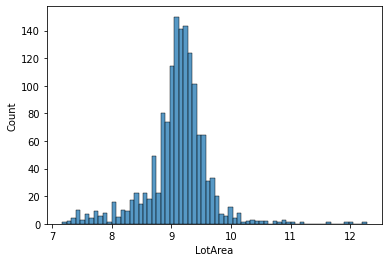

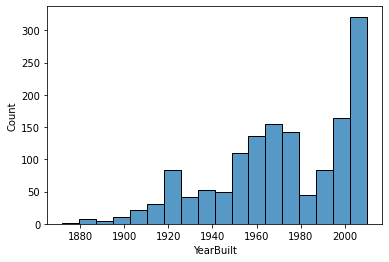

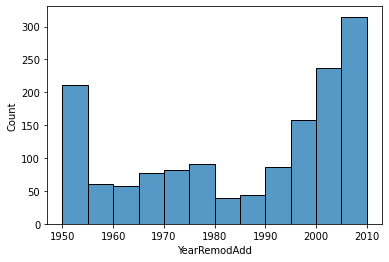

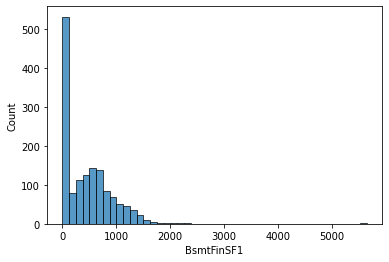

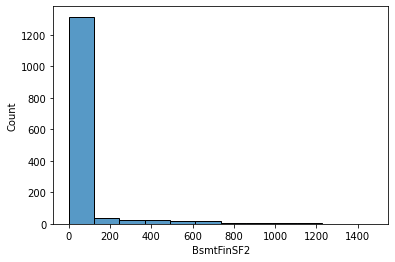

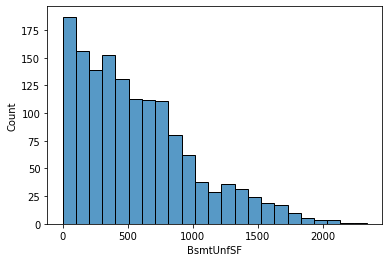

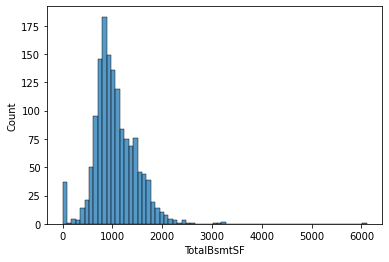

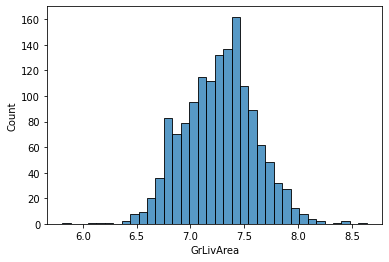

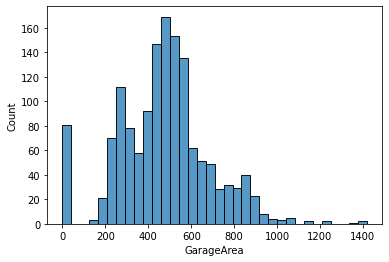

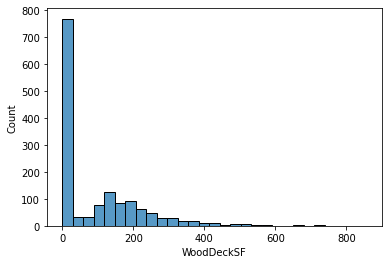

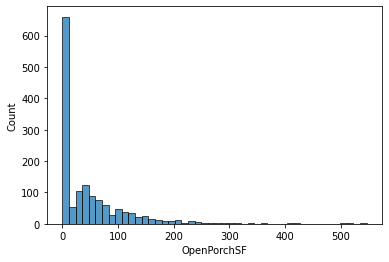

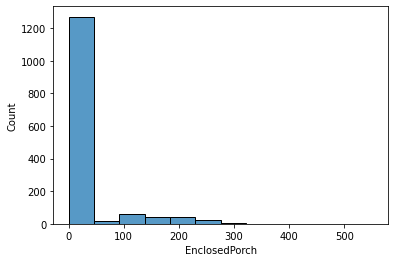

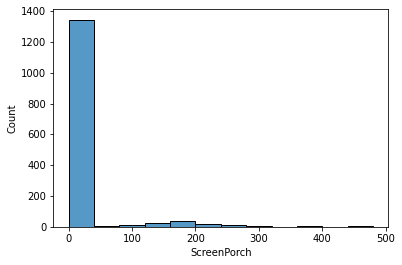

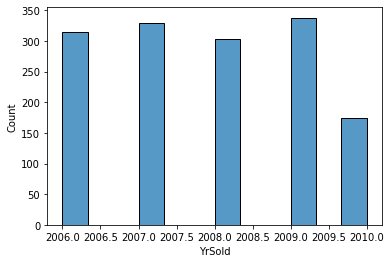

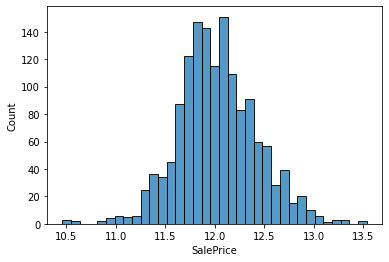

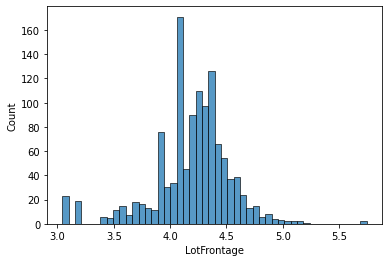

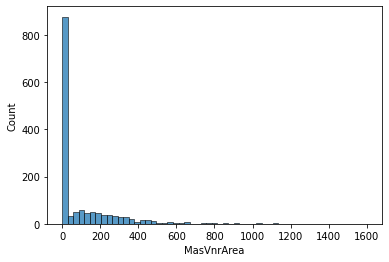

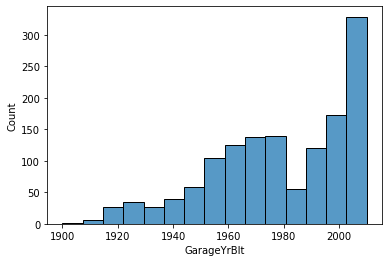

In [23]:
print(continious_columns)
continious_columns.remove('1stFlrSF')
continious_columns.remove('2ndFlrSF')
for col in continious_columns :
    sns.histplot(x=data[col])
    plt.show()


## # Now lets check the variation of continious values 

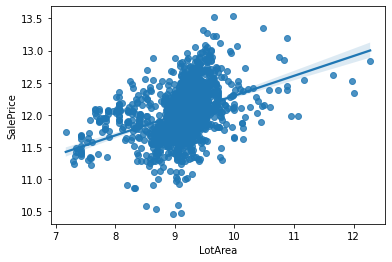

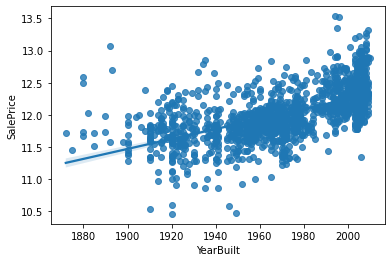

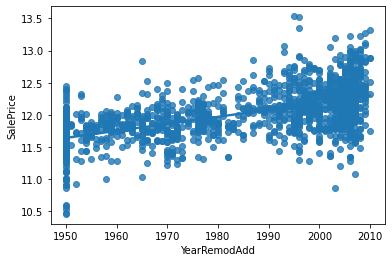

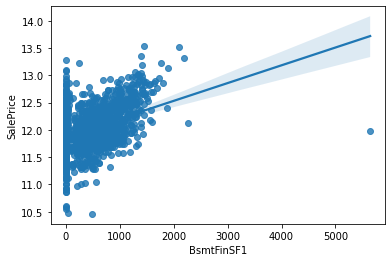

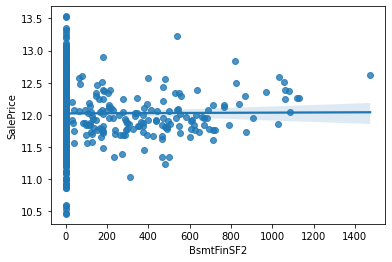

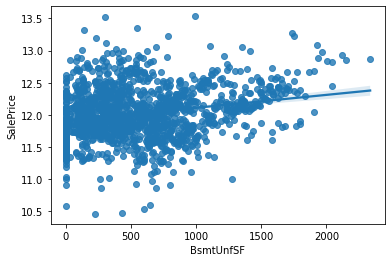

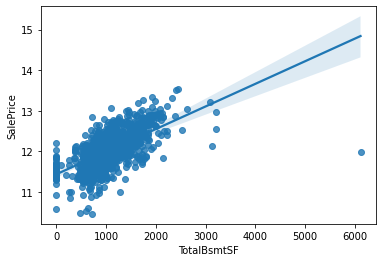

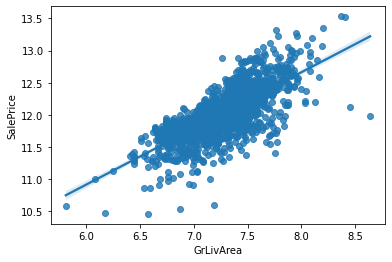

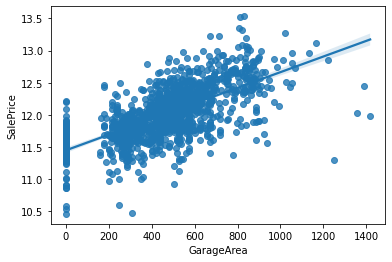

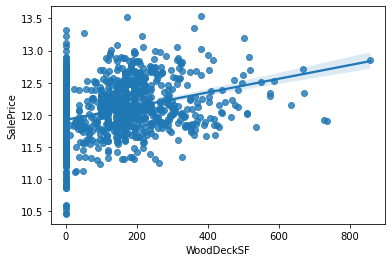

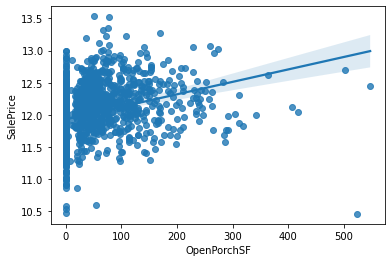

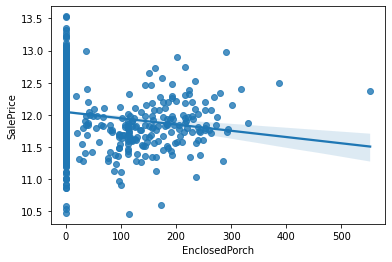

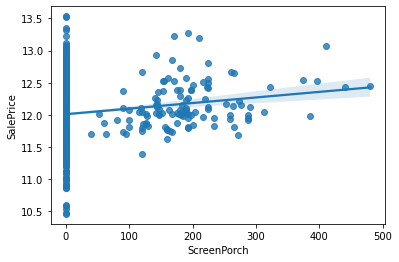

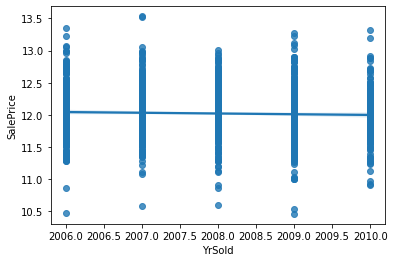

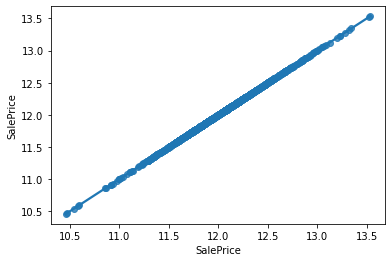

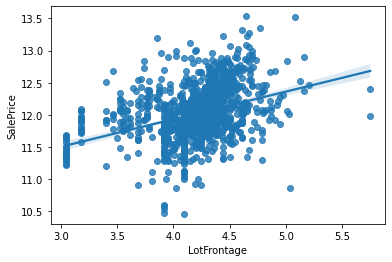

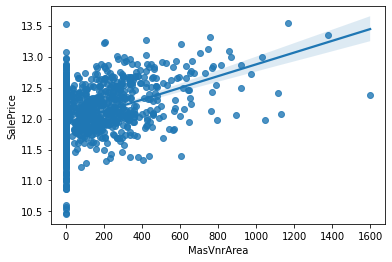

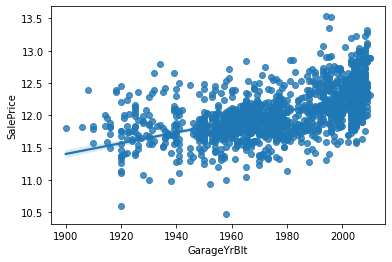

In [24]:

for col in continious_columns:
    sns.regplot(data=data,x=col,y='SalePrice')
    plt.show()

## How to check outliers?

### generally we use box plots

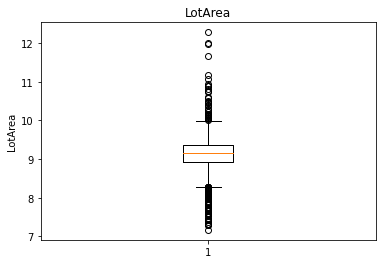

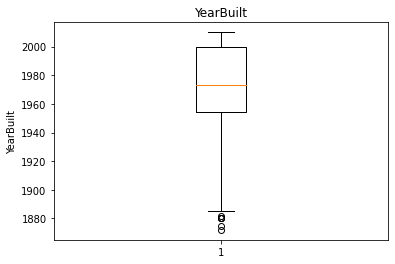

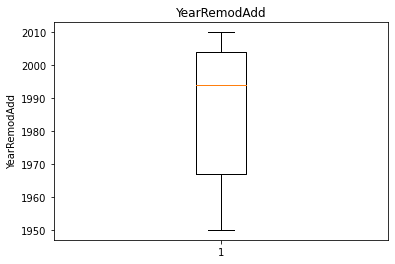

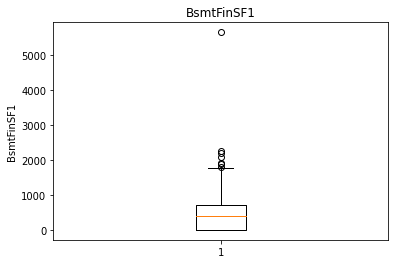

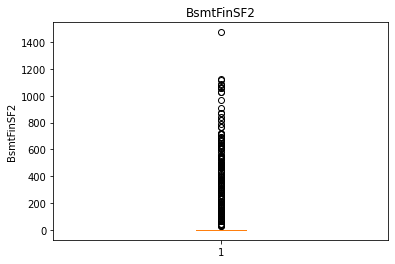

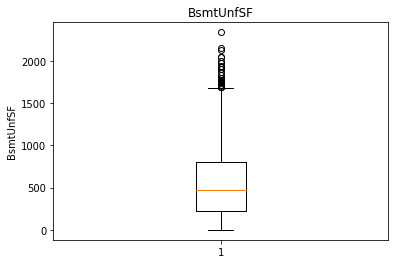

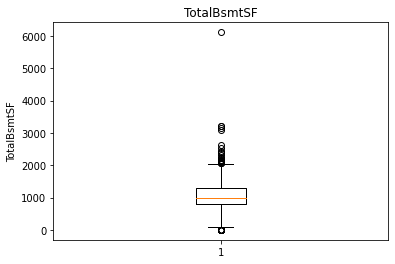

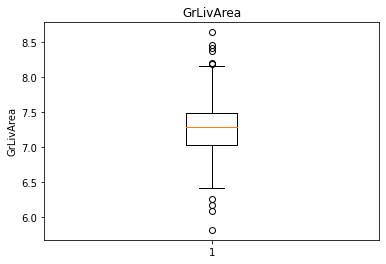

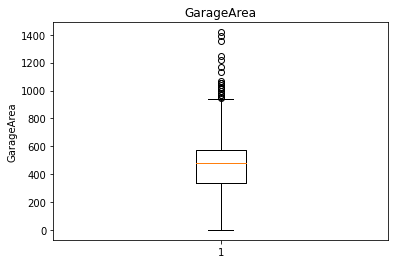

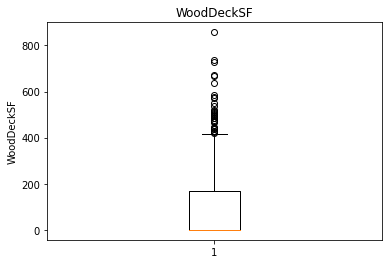

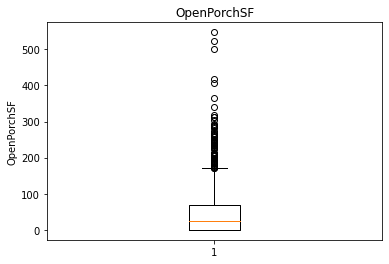

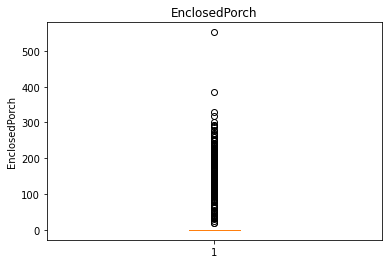

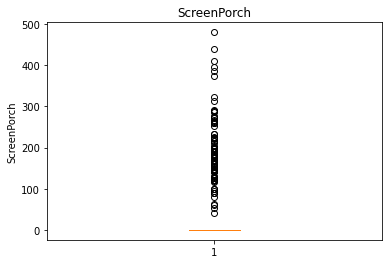

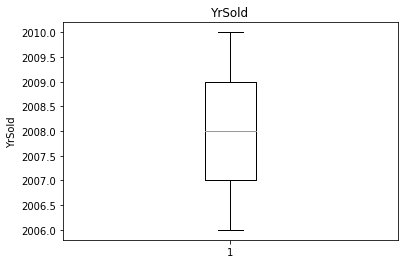

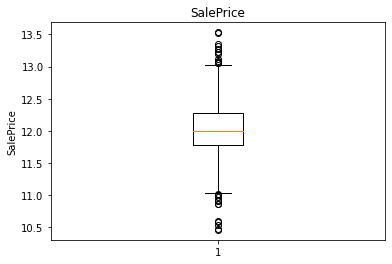

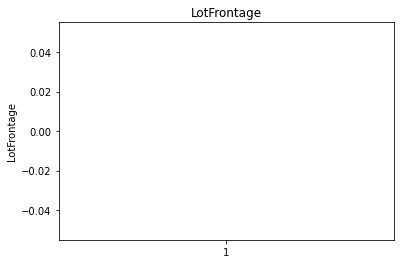

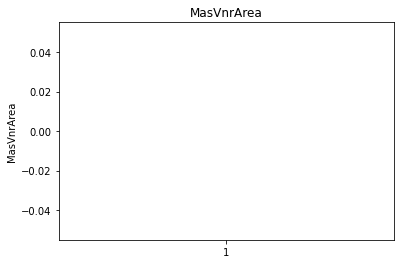

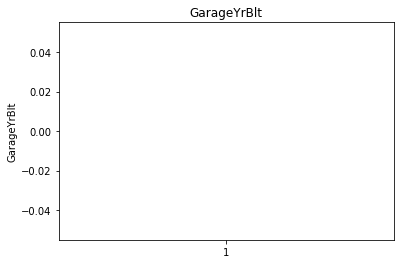

In [25]:
for col in continious_columns:
    plt.boxplot(data[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

# categorical features

In [26]:
categorical_columns=[]
for col in data.columns:
    if data[col].dtype=='object':
        categorical_columns.append(col)

In [27]:
data[categorical_columns].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [28]:
# Now we will print the unique values in categorical column

for col in categorical_columns:
    print(f'the category is" {col}" , the number of unique value is {len(data[col].unique())}')
    

the category is" MSZoning" , the number of unique value is 5
the category is" Street" , the number of unique value is 2
the category is" Alley" , the number of unique value is 3
the category is" LotShape" , the number of unique value is 4
the category is" LandContour" , the number of unique value is 4
the category is" Utilities" , the number of unique value is 2
the category is" LotConfig" , the number of unique value is 5
the category is" LandSlope" , the number of unique value is 3
the category is" Neighborhood" , the number of unique value is 25
the category is" Condition1" , the number of unique value is 9
the category is" Condition2" , the number of unique value is 8
the category is" BldgType" , the number of unique value is 5
the category is" HouseStyle" , the number of unique value is 8
the category is" RoofStyle" , the number of unique value is 6
the category is" RoofMatl" , the number of unique value is 8
the category is" Exterior1st" , the number of unique value is 15
the cat

### First of all we are replacing NAN values with "Missing" probably might create a new feature out of this

In [29]:
for col in data.columns:
    if data[col].isna().sum()>0:
        print(f' the missing feature is {col} with {data[col].isna().sum()} values')

 the missing feature is LotFrontage with 259 values
 the missing feature is Alley with 1369 values
 the missing feature is MasVnrType with 8 values
 the missing feature is MasVnrArea with 8 values
 the missing feature is BsmtQual with 37 values
 the missing feature is BsmtCond with 37 values
 the missing feature is BsmtExposure with 38 values
 the missing feature is BsmtFinType1 with 37 values
 the missing feature is BsmtFinType2 with 38 values
 the missing feature is Electrical with 1 values
 the missing feature is FireplaceQu with 690 values
 the missing feature is GarageType with 81 values
 the missing feature is GarageYrBlt with 81 values
 the missing feature is GarageFinish with 81 values
 the missing feature is GarageQual with 81 values
 the missing feature is GarageCond with 81 values
 the missing feature is PoolQC with 1453 values
 the missing feature is Fence with 1179 values
 the missing feature is MiscFeature with 1406 values


In [30]:
for col in categorical_columns:
    if data[col].isna().sum()>0:
        data[col].fillna('missing',inplace=True)

In [31]:
print(data.isna().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
TotalFlrsF         0
Length: 79, dtype: int64


In [32]:
'''for col in numerical_data:
    if data[col].isna().sum()>0:
        data[col].fillna(np.median(data[col]),inplace=True)'''
numerical_data.remove('1stFlrSF')
numerical_data.remove('2ndFlrSF')
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
data.loc[:,numerical_data]=imputer.fit_transform(data.loc[:,numerical_data])     

### Another method was KNN imputer , which gave us some good estimations which we used above

In [33]:
data.isna().sum().sum()

0

In [34]:
data.head()

MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0        60.0       RL     4.174387  9.041922   Pave  missing      Reg   
1        20.0       RL     4.382027  9.169518   Pave  missing      Reg   
2        60.0       RL     4.219508  9.328123   Pave  missing      IR1   
3        70.0       RL     4.094345  9.164296   Pave  missing      IR1   
4        60.0       RL     4.430817  9.565214   Pave  missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story          7.0          5.0     2003.0   
1       Norm     1Fam     1Story          6.0          8.0     1976.0   
2       Norm     1Fam     2Story          7.0          5.0     2001.0   
3       Norm     1Fam     2Story          7.0          5.0     1915.0   
4       Norm     1Fam     2Story          8.0          5.0     2000.0   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0        2003.0     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1        1976.0     Gable  CompShg     MetalSd     MetalSd       None   
2        2002.0     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3        1970.0     Gable  CompShg     Wd Sdng     Wd Shng       None   
4        2000.0     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  LowQualFinSF  GrLivArea  \
0    GasA        Ex          Y      SBrkr           0.0   7.444249   
1    GasA        Ex          Y      SBrkr           0.0   7.140453   
2    GasA        Ex          Y      SBrkr           0.0   7.487734   
3    GasA        Gd          Y      SBrkr           0.0   7.448334   
4    GasA        Ex          Y      SBrkr           0.0   7.695303   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           1.0           0.0       2.0       1.0           3.0           1.0   
1           0.0           1.0       2.0       0.0           3.0           1.0   
2           1.0           0.0       2.0       1.0           3.0           1.0   
3           1.0           0.0       1.0       0.0           3.0           1.0   
4           1.0           0.0       2.0       1.0           4.0           1.0   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd           8.0        Typ         0.0     missing     Attchd   
1          TA           6.0        Typ         1.0          TA     Attchd   
2          Gd           6.0        Typ         1.0          TA     Attchd   
3          Gd           7.0        Typ         1.0          Gd     Detchd   
4         

## This marks the end of missing values of the data

### Now how to deal with missing data , for that,
### 1. we will use missing values as possibly a new feature. 

###  Now we will sort year sold problem

In [35]:
dataset=data.copy()

In [36]:
for col in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    dataset[col]=dataset['YrSold']-dataset[col]

In [37]:
dataset.head()

MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0        60.0       RL     4.174387  9.041922   Pave  missing      Reg   
1        20.0       RL     4.382027  9.169518   Pave  missing      Reg   
2        60.0       RL     4.219508  9.328123   Pave  missing      IR1   
3        70.0       RL     4.094345  9.164296   Pave  missing      IR1   
4        60.0       RL     4.430817  9.565214   Pave  missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story          7.0          5.0        5.0   
1       Norm     1Fam     1Story          6.0          8.0       31.0   
2       Norm     1Fam     2Story          7.0          5.0        7.0   
3       Norm     1Fam     2Story          7.0          5.0       91.0   
4       Norm     1Fam     2Story          8.0          5.0        8.0   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0           5.0     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          31.0     Gable  CompShg     MetalSd     MetalSd       None   
2           6.0     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          36.0     Gable  CompShg     Wd Sdng     Wd Shng       None   
4           8.0     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  LowQualFinSF  GrLivArea  \
0    GasA        Ex          Y      SBrkr           0.0   7.444249   
1    GasA        Ex          Y      SBrkr           0.0   7.140453   
2    GasA        Ex          Y      SBrkr           0.0   7.487734   
3    GasA        Gd          Y      SBrkr           0.0   7.448334   
4    GasA        Ex          Y      SBrkr           0.0   7.695303   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           1.0           0.0       2.0       1.0           3.0           1.0   
1           0.0           1.0       2.0       0.0           3.0           1.0   
2           1.0           0.0       2.0       1.0           3.0           1.0   
3           1.0           0.0       1.0       0.0           3.0           1.0   
4           1.0           0.0       2.0       1.0           4.0           1.0   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd           8.0        Typ         0.0     missing     Attchd   
1          TA           6.0        Typ         1.0          TA     Attchd   
2          Gd           6.0        Typ         1.0          TA     Attchd   
3          Gd           7.0        Typ         1.0          Gd     Detchd   
4         

### Let's Look at the categorical features now 

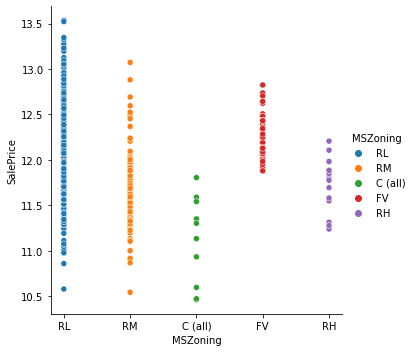

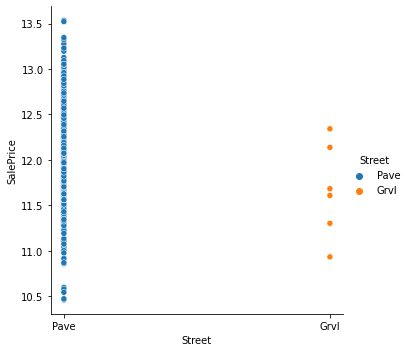

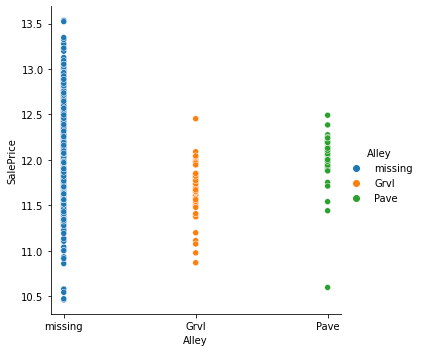

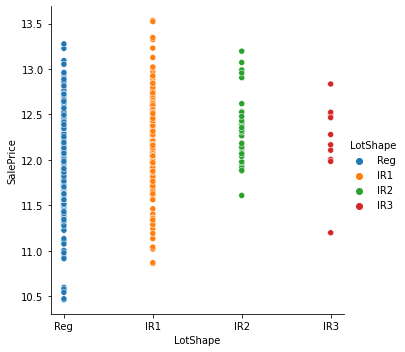

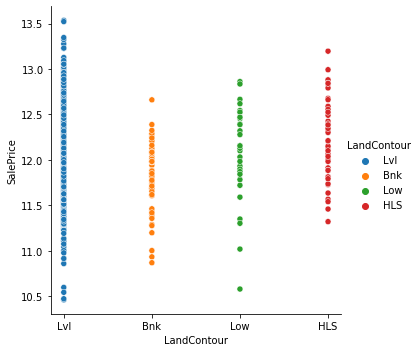

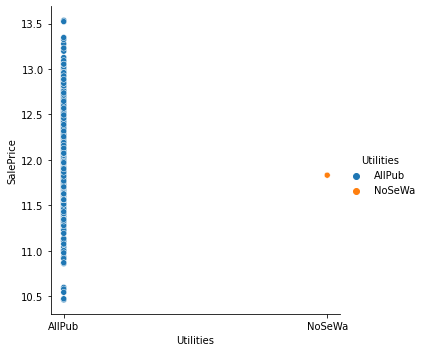

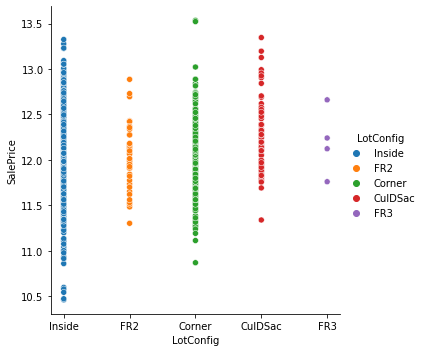

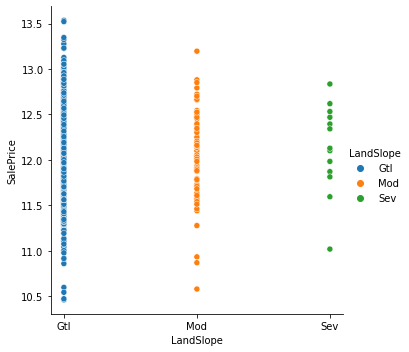

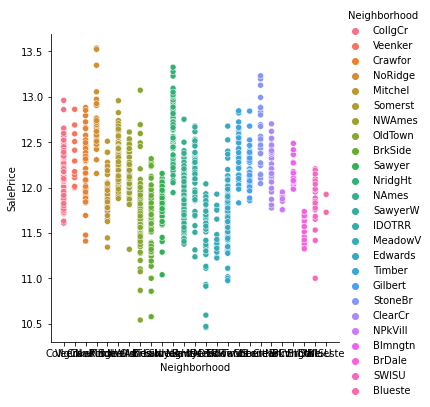

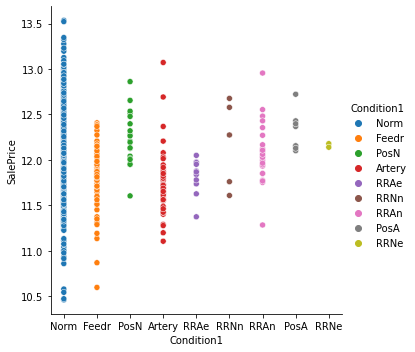

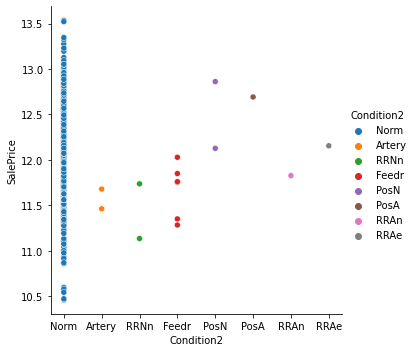

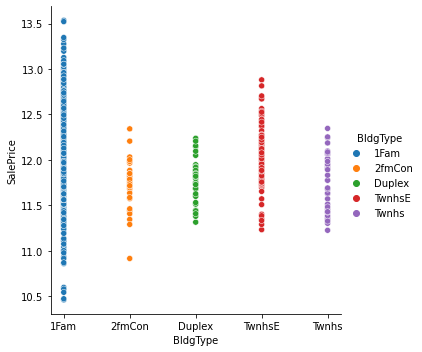

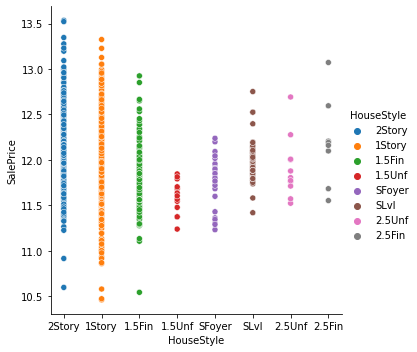

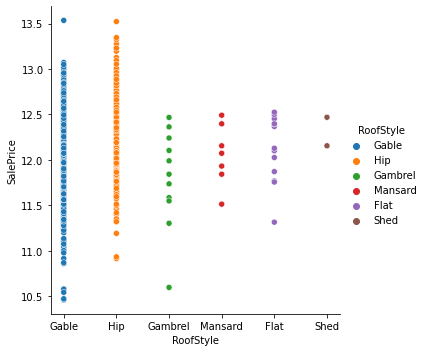

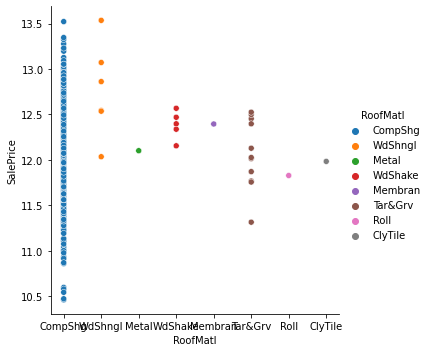

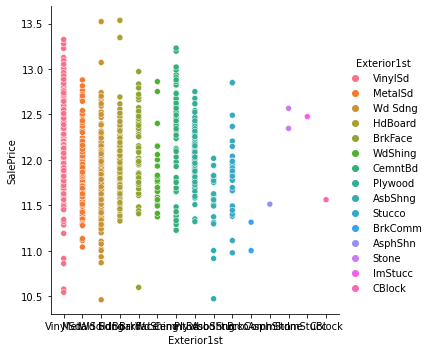

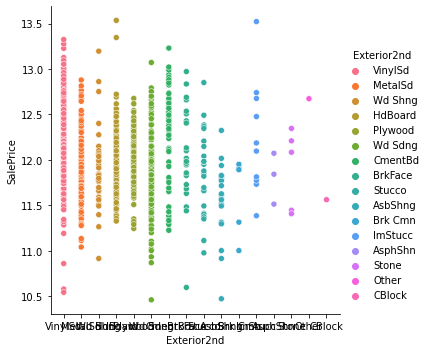

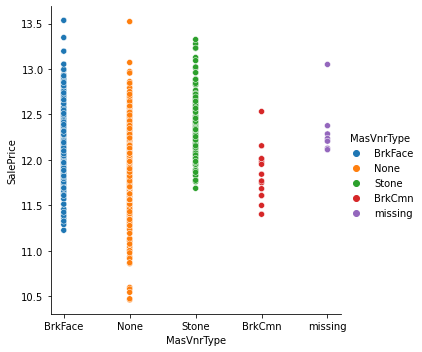

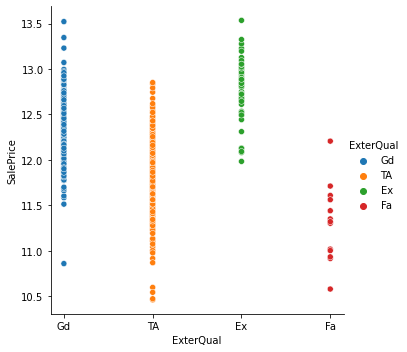

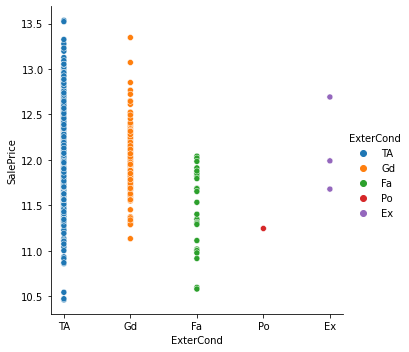

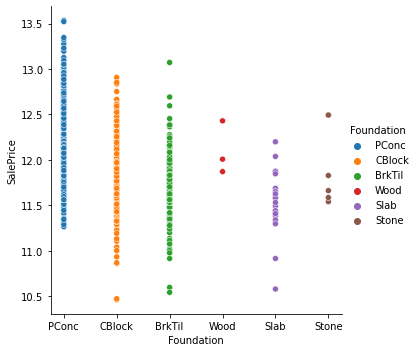

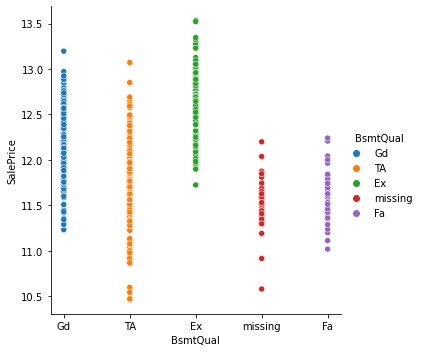

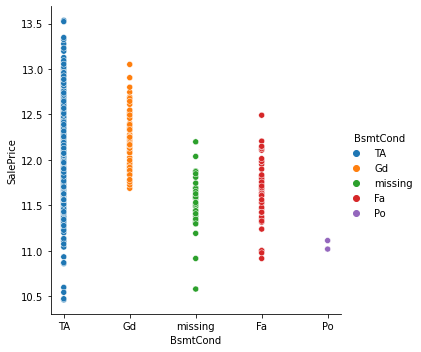

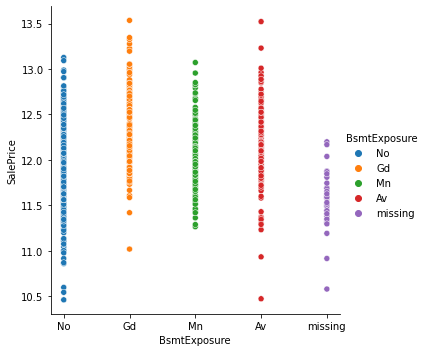

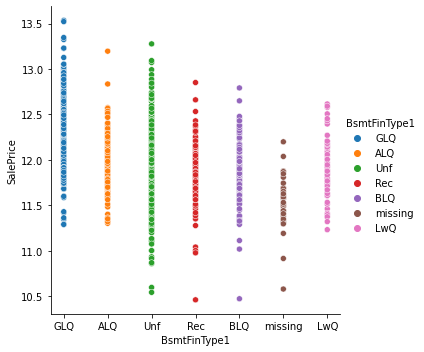

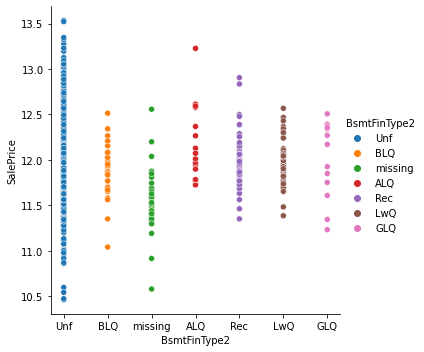

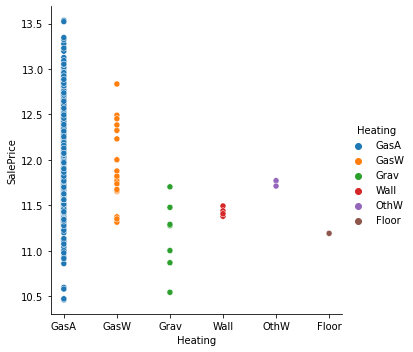

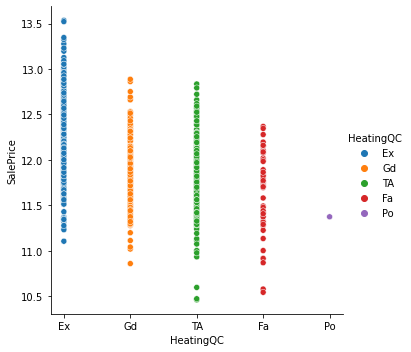

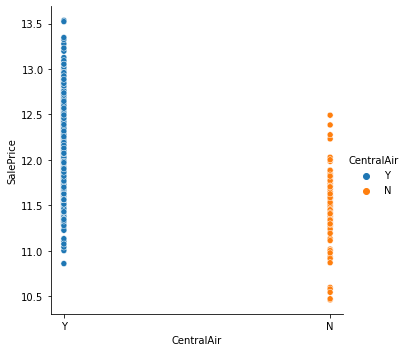

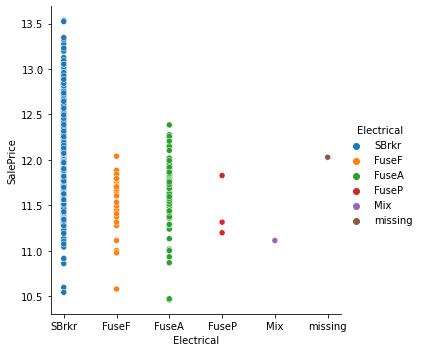

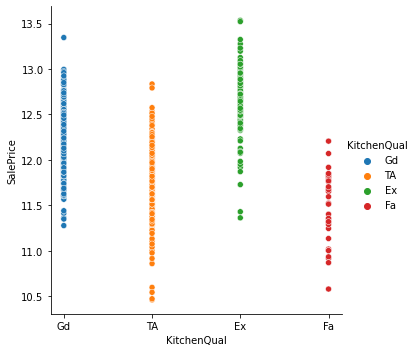

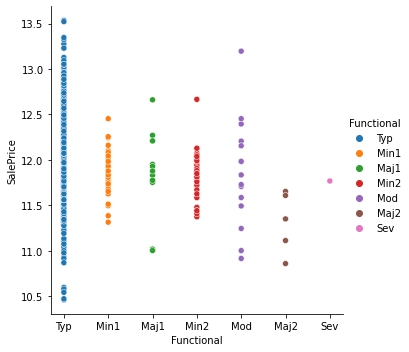

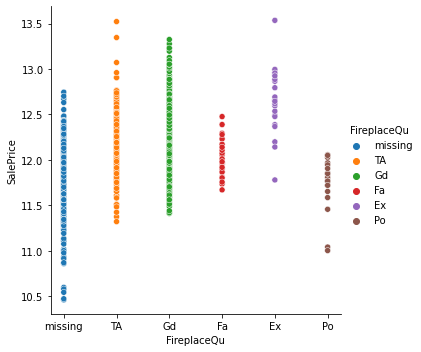

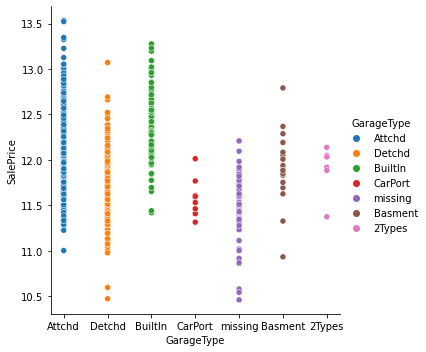

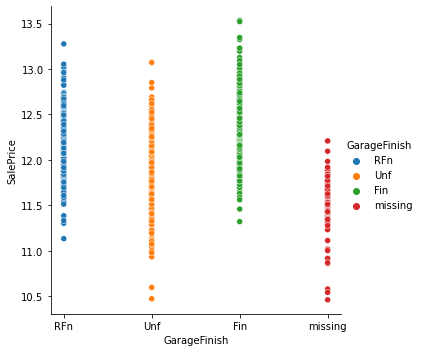

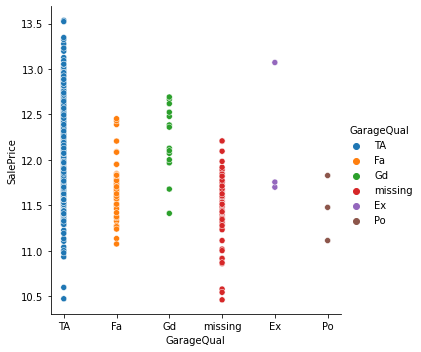

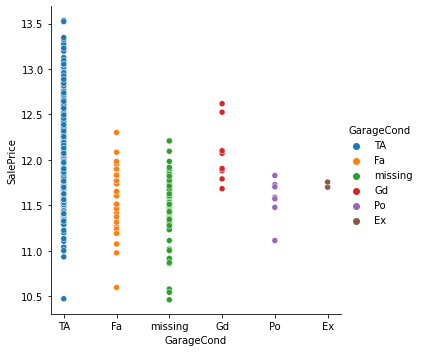

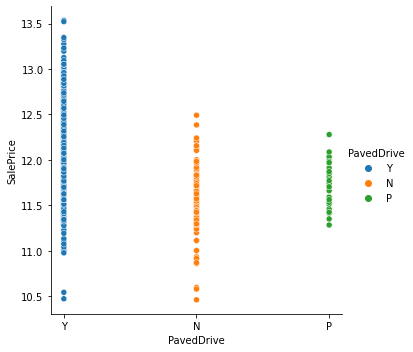

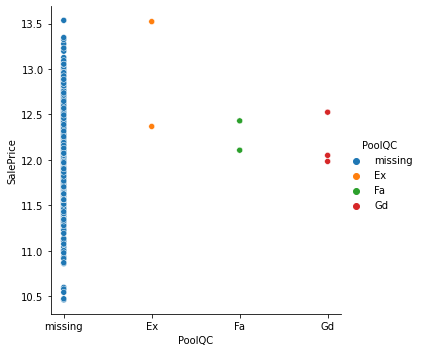

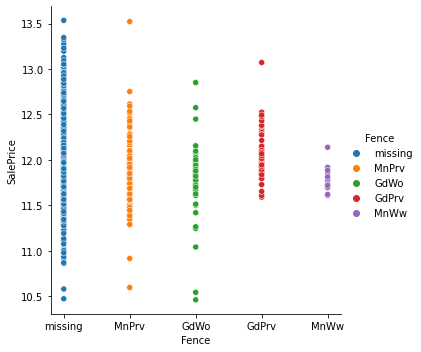

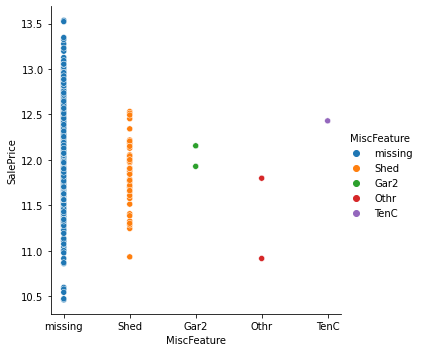

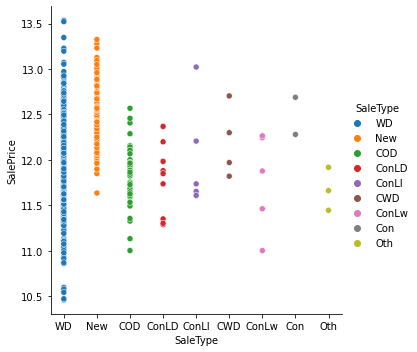

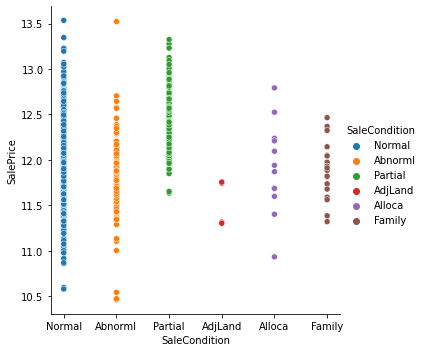

In [38]:
for col in categorical_columns:
    sns.relplot(data=dataset,x=col,y='SalePrice',hue=col)
    plt.show()

In [39]:
## We will try to label them according to the data that gets available

In [40]:
for feature in categorical_columns:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values() 
    # Basically we grouped by features , we took the mean of sale price , and we sorted the values accodingly
    print(labels_ordered)

MSZoning
C (all)    11.118259
RM         11.692893
RH         11.749840
RL         12.085885
FV         12.246616
Name: SalePrice, dtype: float64
Street
Grvl    11.667435
Pave    12.025522
Name: SalePrice, dtype: float64
Alley
Grvl       11.673354
Pave       11.996812
missing    12.037675
Name: SalePrice, dtype: float64
LotShape
Reg    11.936094
IR1    12.163465
IR3    12.205413
IR2    12.318450
Name: SalePrice, dtype: float64
LandContour
Bnk    11.810740
Lvl    12.022694
Low    12.120086
HLS    12.259257
Name: SalePrice, dtype: float64
Utilities
NoSeWa    11.831379
AllPub    12.024183
Name: SalePrice, dtype: float64
LotConfig
Inside     12.001900
Corner     12.027446
FR2        12.034741
FR3        12.195684
CulDSac    12.249810
Name: SalePrice, dtype: float64
LandSlope
Gtl    12.020565
Mod    12.076866
Sev    12.130561
Name: SalePrice, dtype: float64
Neighborhood
IDOTRR     11.446889
MeadowV    11.474522
BrDale     11.547864
BrkSide    11.679727
OldTown    11.703865
Edwards    11.712

In [41]:
for feature in categorical_columns:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    dict={}
    for index,item in enumerate(labels_ordered):
        dict[item]=index
        print(item,dict[item])
    dataset[feature]=dataset[feature].map(dict)

C (all) 0
RM 1
RH 2
RL 3
FV 4
Grvl 0
Pave 1
Grvl 0
Pave 1
missing 2
Reg 0
IR1 1
IR3 2
IR2 3
Bnk 0
Lvl 1
Low 2
HLS 3
NoSeWa 0
AllPub 1
Inside 0
Corner 1
FR2 2
FR3 3
CulDSac 4
Gtl 0
Mod 1
Sev 2
IDOTRR 0
MeadowV 1
BrDale 2
BrkSide 3
OldTown 4
Edwards 5
Sawyer 6
Blueste 7
SWISU 8
NPkVill 9
NAmes 10
Mitchel 11
SawyerW 12
NWAmes 13
Gilbert 14
CollgCr 15
Blmngtn 16
Crawfor 17
ClearCr 18
Somerst 19
Veenker 20
Timber 21
StoneBr 22
NridgHt 23
NoRidge 24
Artery 0
Feedr 1
RRAe 2
Norm 3
RRAn 4
RRNe 5
RRNn 6
PosN 7
PosA 8
RRNn 0
Artery 1
Feedr 2
RRAn 3
Norm 4
RRAe 5
PosN 6
PosA 7
2fmCon 0
Twnhs 1
Duplex 2
1Fam 3
TwnhsE 4
1.5Unf 0
SFoyer 1
1.5Fin 2
2.5Unf 3
1Story 4
SLvl 5
2Story 6
2.5Fin 7
Gambrel 0
Gable 1
Mansard 2
Flat 3
Hip 4
Shed 5
Roll 0
ClyTile 1
CompShg 2
Tar&Grv 3
Metal 4
WdShake 5
Membran 6
WdShngl 7
BrkComm 0
AsphShn 1
AsbShng 2
CBlock 3
Wd Sdng 4
WdShing 5
MetalSd 6
Stucco 7
HdBoard 8
Plywood 9
BrkFace 10
CemntBd 11
VinylSd 12
Stone 13
ImStucc 14
CBlock 0
AsbShng 1
Brk Cmn 2
AsphShn 3
Wd

In [42]:
dataset.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0        60.0         3     4.174387  9.041922       1      2         0   
1        20.0         3     4.382027  9.169518       1      2         0   
2        60.0         3     4.219508  9.328123       1      2         1   
3        70.0         3     4.094345  9.164296       1      2         1   
4        60.0         3     4.430817  9.565214       1      2         1   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          1          0          0            15           3   
1            1          1          2          0            20           1   
2            1          1          0          0            15           3   
3            1          1          1          0            17           3   
4            1          1          2          0            24           3   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           4         3           6          7.0          5.0        5.0   
1           4         3           4          6.0          8.0       31.0   
2           4         3           6          7.0          5.0        7.0   
3           4         3           6          7.0          5.0       91.0   
4           4         3           6          8.0          5.0        8.0   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0           5.0          1         2           12           13           2   
1          31.0          1         2            6            6           1   
2           6.0          1         2           12           13           2   
3          36.0          1         2            4            7           1   
4           8.0          1         2           12           13           2   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          3           5         3         3   
1         0.0          1          3           2         3         3   
2       162.0          2          3           5         3         3   
3         0.0          1          3           1         2         4   
4       350.0          2          3           5         3         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             6       706.0             5         0.0   
1             4             4       978.0             5         0.0   
2             2             6       486.0             5         0.0   
3             1             4       216.0             5         0.0   
4             3             6       655.0             5         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0      150.0        856.0        5          4           1           5   
1      284.0       1262.0        5          4           1           5   
2      434.0        920.0        5          4           1           5   
3      540.0        756.0        5          3           1           5   
4      490.0       1145.0        5          4           1           5   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0           0.0   7.444249           1.0           0.0       2.0       1.0   
1           0.0   7.140453           0.0           1.0       2.0       0.0   
2           0.0   7.487734           1.0           0.0       2.0       1.0   
3           0.0   7.448334           1.0           0.0       1.0       0.0   
4           0.0   7.695303           1.0           0.0       2.0       1.0   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0           3.0           1.0            2           8.0           6   
1           3.0           1.0            1           6.0           6   
2           3.0           1.0            2           6.0           6   
3           3.0           1.0            2           7.0           6   
4           4.0           1.0            

#### one thing we noticed during out 2nd exploratory data analysis is is the 1st flor st and 2nd floor st total area which has been sorted out 


### Now we will use feature scaling using min max scaler

In [43]:
#for scaling the values , we will use scaling features, but before that we have to select
features_scale=[]
for col in dataset.columns:
    if col =='SalePrice':
        pass
    else:
        features_scale.append(col)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[features_scale])

MinMaxScaler()

In [44]:
final_data=pd.DataFrame(scaler.transform(dataset[features_scale]),columns=features_scale)

In [114]:
final_data.shape

(1460, 78)

In [46]:
final_data.to_csv('x_train_final.csv',index=False)

In [47]:
dataset['SalePrice'].to_csv('y_train_final.csv')

## Visualizing under PCA

In [48]:
from sklearn.decomposition import PCA

In [67]:
pca=PCA(n_components=2)
X2D=pca.fit_transform(final_data)

In [68]:
X2D=pd.DataFrame(scaler.fit_transform(X2D),columns=['1st_Axis','2nd_Axis'])

In [69]:
X2D['SalePrice']=dataset['SalePrice']

In [86]:
print(dataset.shape)
dataset.head()

(1460, 79)


MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0        60.0         3     4.174387  9.041922       1      2         0   
1        20.0         3     4.382027  9.169518       1      2         0   
2        60.0         3     4.219508  9.328123       1      2         1   
3        70.0         3     4.094345  9.164296       1      2         1   
4        60.0         3     4.430817  9.565214       1      2         1   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          1          0          0            15           3   
1            1          1          2          0            20           1   
2            1          1          0          0            15           3   
3            1          1          1          0            17           3   
4            1          1          2          0            24           3   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           4         3           6          7.0          5.0        5.0   
1           4         3           4          6.0          8.0       31.0   
2           4         3           6          7.0          5.0        7.0   
3           4         3           6          7.0          5.0       91.0   
4           4         3           6          8.0          5.0        8.0   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0           5.0          1         2           12           13           2   
1          31.0          1         2            6            6           1   
2           6.0          1         2           12           13           2   
3          36.0          1         2            4            7           1   
4           8.0          1         2           12           13           2   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          3           5         3         3   
1         0.0          1          3           2         3         3   
2       162.0          2          3           5         3         3   
3         0.0          1          3           1         2         4   
4       350.0          2          3           5         3         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             6       706.0             5         0.0   
1             4             4       978.0             5         0.0   
2             2             6       486.0             5         0.0   
3             1             4       216.0             5         0.0   
4             3             6       655.0             5         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0      150.0        856.0        5          4           1           5   
1      284.0       1262.0        5          4           1           5   
2      434.0        920.0        5          4           1           5   
3      540.0        756.0        5          3           1           5   
4      490.0       1145.0        5          4           1           5   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0           0.0   7.444249           1.0           0.0       2.0       1.0   
1           0.0   7.140453           0.0           1.0       2.0       0.0   
2           0.0   7.487734           1.0           0.0       2.0       1.0   
3           0.0   7.448334           1.0           0.0       1.0       0.0   
4           0.0   7.695303           1.0           0.0       2.0       1.0   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0           3.0           1.0            2           8.0           6   
1           3.0           1.0            1           6.0           6   
2           3.0           1.0            2           6.0           6   
3           3.0           1.0            2           7.0           6   
4           4.0           1.0            

###   To create a 3D plot

#### https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

In [73]:
from mpl_toolkits import mplot3d
%matplotlib notebook # to make matplot lib interactive
import matplotlib.pyplot as plt 

<IPython.core.display.Javascript object>


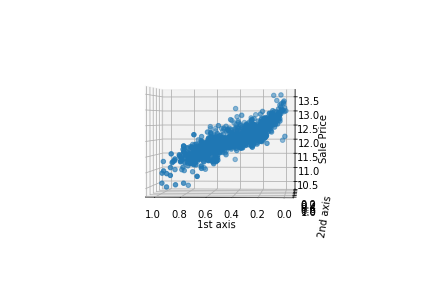

Text(0.5, 0, 'Sale Price')

In [77]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(X2D['1st_Axis'],X2D['2nd_Axis'],X2D['SalePrice'])
ax.set_xlabel('1st axis')
ax.set_ylabel('2nd axis')
ax.set_zlabel('Sale Price')

### As we can see there seems to be a line which can be drawn in 3D plane

### In Dtale 3d plots also which you can visually see the relationship better

In [78]:
import dtale

dtale.show(X2D)

### Now the main thing we want to know that lets say that out of 100 % variance .
#### How much is captured in the first axis , how much in 2nd axis and finally how much variance the PCA plot could not capture

In [87]:
# For that
pca.explained_variance_ratio_

# Well we can see that PCA could not actually capture the main varinces of the dataframe
#as only 26% of the total variance was captured which is not really good 

array([0.25946917, 0.06084069])

## How many dimensions to chose in PCA??
### such that it preserves 95% of the data variance at least

In [104]:
pca2=PCA(n_components=0.95) # if n<1 then it will see it as variance and will preserve that variance of 95%
pca2.fit(dataset.drop('SalePrice',axis=1))
Dimension_reduction=pd.DataFrame(pca2.fit_transform(dataset.drop('SalePrice',axis=1)))

In [105]:
pca2.explained_variance_ratio_

array([0.33024593, 0.28988908, 0.2493328 , 0.03884057, 0.03481042,
       0.02352634])

In [107]:
Dimension_reduction

0           1            2           3           4           5
0     184.424131  468.412322  -129.564844  168.255002  -20.655202   22.013896
1     577.351311  242.602903   -75.792274  -99.246400  -88.572444 -100.793767
2       4.373190  154.616947   -75.027928  178.416054    7.839510  -30.502936
3    -335.526332  102.030130   -70.945956  159.654879   38.721582 -178.342431
4     325.160944  -14.398821   -40.313455  384.216034  105.179111    9.786948
...          ...         ...          ...         ...         ...         ...
1455 -491.949231 -354.139798    11.899084  -10.176691  -35.707262  -80.258074
1456  562.895713 -197.438747     5.036841 -144.896651   98.746541   14.386046
1457 -239.358564  153.816761  2468.438829 -196.771255 -146.935301   30.102394
1458 -201.730325  395.651898  -118.644662 -564.325202  983.052817  209.380893
1459  489.213607  350.391427   -96.882912 -296.496334  206.423496   44.608944

[1460 rows x 6 columns]

## Now we will normalize the data

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler2=MinMaxScaler()
PCA_x_data=pd.DataFrame(scaler2.fit_transform(Dimension_reduction))

In [109]:
PCA_x_data.head()

0         1         2         3         4         5
0  0.146134  0.523952  0.007093  0.559658  0.185484  0.296484
1  0.194225  0.481447  0.010585  0.388812  0.150069  0.223333
2  0.124096  0.464884  0.010635  0.566147  0.200342  0.265202
3  0.082495  0.454986  0.010900  0.554165  0.216446  0.177140
4  0.163359  0.433069  0.012889  0.697586  0.251099  0.289201

In [113]:
PCA_x_data.to_csv('PCA_final_data.csv')